In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('logs/Cora_mask1.csv')
data2 = pd.read_csv('logs/Cora_mask2.csv')
# 去除最后一行
data = data[:-1]
data2 = data2[:-1]

# 在同一张图上画多个曲线
# 设置图的大小和清晰度
plt.figure(dpi=600,figsize=(20, 5))
plt.plot(data['epoch'], data['loss'], label='mask1')
plt.plot(data2['epoch'], data2['loss'], label='mask2')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'pandas'

In [2]:
import dgl
import torch

# 构建有向图
g = dgl.DGLGraph()
g.add_nodes(5)
g.add_edges([0, 1, 1, 2, 3, 4], [1, 2, 3, 0, 4, 0]) # 添加边

# 定义输入节点列表
input_nodes = [0, 3]

# 将邻接矩阵转换为 COO 格式，并移动到 GPU 上
device = torch.device('cuda')
adj = g.adjacency_matrix().coalesce().to(device)

# 使用索引操作获取所有与输入节点相连的节点
rows, cols, _ = adj.coo()
neighs = cols[rows == torch.tensor(input_nodes).to(device)]

# 打印结果
print(neighs)

/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


AttributeError: 'Tensor' object has no attribute 'coo'

In [41]:
# import dgl

# # 创建一个包含浮点数节点索引的张量
# node_indices = torch.tensor([0.0, 1.0, 2.0])

# # 将节点索引张量转换为整数类型
# node_indices = node_indices.long()

# # 创建一个图对象
# num_nodes = 5
# edges = [(0,1),(1,2),(1,3),(2,4),(3,0),(3,2),  (1,0),(2,1),(3,1),(4,2),(0,3),(2,3)] 
# graph = dgl.graph(edges, num_nodes=num_nodes)


# # 将图对象转换为邻接矩阵
# adj_matrix =graph.adjacency_matrix()

# # 选择节点3
# node = torch.tensor([3])

# # 获得节点3的邻居
# neighbors = adj_matrix[node]

# print(neighbors)

import dgl
import torch

# 创建一个图对象
num_nodes = 5
edges = [(0,1),(1,2),(1,3),(2,4),(3,0),(3,2), (1,0),(2,1),(3,1),(4,2),(0,3),(2,3)] 
graph = dgl.graph(edges, num_nodes=num_nodes)

# 选择多个节点
nodes = torch.tensor([1, 2, 3])

# 将图对象转换为邻接矩阵
adj_matrix = graph.adjacency_matrix()

# 获得这些节点的邻居
neighbors = adj_matrix[nodes].to_dense()

# 将邻居节点合并为一个无重复的点集
unique_neighbors, _ = torch.unique(neighbors, dim=1, return_inverse=True)

print(unique_neighbors.squeeze())


NotImplementedError: Could not run 'aten::index.Tensor' with arguments from the 'SparseCPU' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'aten::index.Tensor' is only available for these backends: [CPU, CUDA, QuantizedCPU, BackendSelect, Python, Named, Conjugate, Negative, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradLazy, AutogradXPU, AutogradMLC, AutogradHPU, AutogradNestedTensor, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, Tracer, UNKNOWN_TENSOR_TYPE_ID, Autocast, Batched, VmapMode].

CPU: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/build/aten/src/ATen/RegisterCPU.cpp:18433 [kernel]
CUDA: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/build/aten/src/ATen/RegisterCUDA.cpp:26496 [kernel]
QuantizedCPU: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/build/aten/src/ATen/RegisterQuantizedCPU.cpp:1068 [kernel]
BackendSelect: fallthrough registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/core/BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/core/PythonFallbackKernel.cpp:47 [backend fallback]
Named: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/ConjugateFallback.cpp:18 [backend fallback]
Negative: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/NegateFallback.cpp:18 [backend fallback]
ADInplaceOrView: fallthrough registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/core/VariableFallbackKernel.cpp:64 [backend fallback]
AutogradOther: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradCPU: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradCUDA: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradXLA: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradLazy: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradXPU: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradMLC: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradHPU: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradNestedTensor: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradPrivateUse1: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradPrivateUse2: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
AutogradPrivateUse3: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/VariableType_1.cpp:9548 [autograd kernel]
Tracer: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/torch/csrc/autograd/generated/TraceType_1.cpp:10664 [kernel]
UNKNOWN_TENSOR_TYPE_ID: fallthrough registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/autocast_mode.cpp:466 [backend fallback]
Autocast: fallthrough registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/autocast_mode.cpp:305 [backend fallback]
Batched: registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/BatchingRegistrations.cpp:1016 [backend fallback]
VmapMode: fallthrough registered at /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]


In [85]:
import dgl
import torch

# 创建一个图对象
num_nodes = 5
edges = [(0,1),(1,2),(1,3),(2,4),(3,0),(3,2), (1,0),(2,1),(3,1),(4,2),(0,3),(2,3)] 
graph = dgl.graph(edges, num_nodes=num_nodes)
graph.to(torch.device('cuda'))

# 选择多个节点
nodes = torch.tensor([0])

def get_neighbors(graph, nodes):


    assert type(nodes) == torch.Tensor, 'nodes must be a tensor'
    # 将图对象转换为邻接矩阵
    adj_matrix = graph.adjacency_matrix()

    print(nodes)
    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)


    print(neighbors)

    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()

    neighbors.indices()[1]

    # unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
def get_all_neighbors(graph, nodes, depth):
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors(graph, nodes)
        return get_all_neighbors(graph, neighbors, depth-1)

# 获得节点0的所有邻居
all_neighbors = get_all_neighbors(graph, nodes, 1)
all_neighbors

# # 将邻居节点合并为一个无重复的点集
# unique_neighbors, _ = torch.unique(neighbors, dim=1, return_inverse=True)

# print(unique_neighbors.squeeze())

tensor([0])
tensor(indices=tensor([[0, 0],
                       [1, 3]]),
       values=tensor([1., 1.]),
       size=(1, 5), nnz=2, layout=torch.sparse_coo)


tensor([0, 1, 2, 3, 4])

In [111]:

def get_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重

    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num

    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    # print(type(graph))
    adj_matrix = graph.adjacency_matrix()
    # 判断adj_matrix的是否在GPU上
    # print(adj_matrix.is_cuda)
    adj_matrix = adj_matrix.to(nodes.device)
    # adj_matrix = adj_matrix.to(nodes.device)
    # print(adj_matrix.device)
    assert adj_matrix.is_cuda == True

    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)
    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()
    # neighbors.indices()返回一个2*neighbors_num的矩阵，2 * neighbors_num，第二行是所有邻居节点标号的横向拼接
    unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
def get_all_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重

    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes

    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors(graph, nodes)
        neighbors = torch.cat([nodes, neighbors])
        neighbors = torch.unique(neighbors)
        return get_all_neighbors(graph, neighbors, depth-1)


In [9]:
!bash ;conda activate graph

(base) ]0;root@84dc942e2771: ~/models/SMCLroot@84dc942e2771:~/models/SMCL# ^C

(base) ]0;root@84dc942e2771: ~/models/SMCLroot@84dc942e2771:~/models/SMCL# 

In [3]:
import dgl

def get_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    # print(type(graph))
    adj_matrix = graph.adjacency_matrix()
    # 判断adj_matrix的是否在GPU上
    # print(adj_matrix.is_cuda)
    adj_matrix = adj_matrix.to(nodes.device)
    # adj_matrix = adj_matrix.to(nodes.device)
    # print(adj_matrix.device)
    assert adj_matrix.is_cuda == True

    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)
    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()
    # neighbors.indices()返回一个2*neighbors_num的矩阵，2 * neighbors_num，第二行是所有邻居节点标号的横向拼接
    unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
def get_all_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors(graph, nodes)
        return get_all_neighbors(graph, neighbors, depth-1)



In [13]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

g = dgl.DGLGraph()
g.add_nodes(10)
g.add_edges([0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 4],
            [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 0, 1, 2, 6, 7, 8, 9, 3, 4, 5])
g = g.to(torch.device('cuda'))

nodes = torch.tensor([1,5,9],device="cuda")

print(nodes)
print(get_all_neighbors(g,nodes,1))


tensor([1, 5, 9], device='cuda:0')
tensor([2, 3, 4, 7, 8], device='cuda:0')


In [42]:
# 读取 log 查看 acc 结果
import numpy as np
import os
# 读取文件中的字符串内容

def get_acc(path):
# data = open("./nohup_logs/20230515002301/IMDB-BINARY.log").read()
    data = open(path).read()
    # 按照换行符和逗号分割字符串
    data_ls = data.split("\n")
    acc_ls = []
    for i in data_ls:
        for j in i.split(","):
            if (j.startswith("Acc")):
                # print(j)
                j.replace("Acc: ","")
                acc = float(j.split(": ")[1])
                acc_ls.append(acc)
    if len(acc_ls) == 0:
        print("acc_ls is null")
        return
    # 计算acc的平均值和+/-误差
    acc_mean = np.mean(acc_ls)
    print("acc_mean: ",acc_mean)
    acc_max = np.max(acc_ls)
    print("acc_max", acc_max)
    # 计算负误差
    acc_minus = acc_mean - np.min(acc_ls)
    acc_plus = np.max(acc_ls) - acc_mean
    print("acc_minus: ",acc_minus)
    print("acc_plus: ",acc_plus)
    return acc_max, acc_mean, acc_minus, acc_plus, acc_ls

dir_path = "./nohup_logs/20230522092557/"
path_list = os.listdir(dir_path)
acc_dict = {}
for i in path_list:
    print(f"{i}=====================================")
    path = dir_path + i
    print(path)
    if (get_acc(path) == None):
        continue
    acc_max = get_acc(path)[0]
    name = i.split(".")[0]
    acc_dict[name] = acc_max
print(acc_dict)


COLLAB.log=====================================
./nohup_logs/20230522092557/COLLAB.log
acc_mean:  0.7807217391304347
acc_max 0.783
acc_minus:  0.0015217391304347405
acc_plus:  0.002278260869565285
acc_mean:  0.7807217391304347
acc_max 0.783
acc_minus:  0.0015217391304347405
acc_plus:  0.002278260869565285
IMDB-BINARY.log=====================================
./nohup_logs/20230522092557/IMDB-BINARY.log
acc_mean:  0.7230645161290322
acc_max 0.7350000000000001
acc_minus:  0.012064516129032143
acc_plus:  0.011935483870967878
acc_mean:  0.7230645161290322
acc_max 0.7350000000000001
acc_minus:  0.012064516129032143
acc_plus:  0.011935483870967878
IMDB-MULTI.log=====================================
./nohup_logs/20230522092557/IMDB-MULTI.log
acc_mean:  0.4997435897435898
acc_max 0.5046666666666667
acc_minus:  0.0037435897435897925
acc_plus:  0.004923076923076919
acc_mean:  0.4997435897435898
acc_max 0.5046666666666667
acc_minus:  0.0037435897435897925
acc_plus:  0.004923076923076919
MUTAG.log==

In [24]:
import dgl
from dgl.data import TUDataset

# 加载IMDB-BINARY数据集
dataset = TUDataset("REDDIT-BINARY")

# 获取数据集中的第一个图
graph, label = dataset[0]

# 将图数据转换为DGLGraph对象
g = dgl.to_homogeneous(graph)
print(g)


Graph(num_nodes=218, num_edges=960,
      ndata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64), '_TYPE': Scheme(shape=(), dtype=torch.int64)})


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from dgl.data import TUDataset

# 加载IMDB-BINARY数据集
dataset = TUDataset("IMDB-BINARY")

# 获取数据集中的第一个图
graph, label = dataset[0]

# 创建networkx图对象
nx_g = nx.Graph()
nx_g.add_nodes_from(range(graph.num_nodes()))
nx_g.add_edges_from((u, v) for u, v in zip(*graph.edges()))

# 可视化图
pos = nx.spring_layout(nx_g)
nx.draw(nx_g, pos=pos, node_size=20, node_color='b', with_labels=False)
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


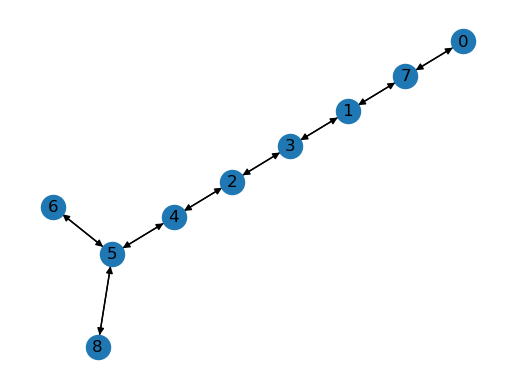

DGLError: [18:20:31] /opt/dgl/src/graph/heterograph_capi.cc:407: Check failed: relabel_nodes: Node subgraph only supports relabel_nodes=True.
Stack trace:
  [bt] (0) /opt/conda/envs/graph/lib/python3.8/site-packages/dgl/libdgl.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x4f) [0x7f46e73107bf]
  [bt] (1) /opt/conda/envs/graph/lib/python3.8/site-packages/dgl/libdgl.so(+0x737dd0) [0x7f46e76a0dd0]
  [bt] (2) /opt/conda/envs/graph/lib/python3.8/site-packages/dgl/libdgl.so(DGLFuncCall+0x48) [0x7f46e7624308]
  [bt] (3) /opt/conda/envs/graph/lib/python3.8/site-packages/dgl/_ffi/_cy3/core.cpython-38-x86_64-linux-gnu.so(+0x171fc) [0x7f46e6f601fc]
  [bt] (4) /opt/conda/envs/graph/lib/python3.8/site-packages/dgl/_ffi/_cy3/core.cpython-38-x86_64-linux-gnu.so(+0x1772b) [0x7f46e6f6072b]
  [bt] (5) /opt/conda/envs/graph/bin/python(_PyObject_MakeTpCall+0x3bb) [0x4e0c8b]
  [bt] (6) /opt/conda/envs/graph/bin/python(_PyEval_EvalFrameDefault+0x4907) [0x4dc8f7]
  [bt] (7) /opt/conda/envs/graph/bin/python() [0x4f50d6]
  [bt] (8) /opt/conda/envs/graph/bin/python(_PyEval_EvalFrameDefault+0x49a9) [0x4dc999]



In [1]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

g = dgl.DGLGraph()
# g.add_edges([0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 4],
#             [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 0, 1, 2, 6, 7, 8, 9, 3, 4, 5])
g.add_edges(
    [1,1,2,2,4,5,5, 0],
    [7,3,3,4,5,8,6, 7]
)
g = dgl.to_bidirected(g)

# print(subg.edge)
# 将DGL图转换为networkx图
nx_g = g.to_networkx()

# 创建matplotlib图形对象
fig, ax = plt.subplots()

# 可视化networkx图
pos = nx.kamada_kawai_layout(nx_g)
nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
plt.show()

subg = g.khop_out_subgraph([3,5], 1, relabel_nodes=False, store_ids=True, output_device='cpu')
# g = g.to(torch.device('cuda'))

# nodes = torch.tensor([1,5,9],device="cuda")

print(subg)
# print(inverse_indices)

# subg = g.khop_out_subgraph([3,5], 1)

# print(subg.edge)
# 将DGL图转换为networkx图
nx_g2 = subg.to_networkx()

# 创建matplotlib图形对象
fig2, ax2 = plt.subplots()

# 可视化networkx图
pos2 = nx.kamada_kawai_layout(nx_g2)
nx.draw(nx_g2, pos=pos2, with_labels=True, ax=ax2)
plt.show()

print(g.edges())
print(subg.edges())
subg.edata[dgl.EID]
# print(get_all_neighbors(g,nodes,1))


1.10.1


/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


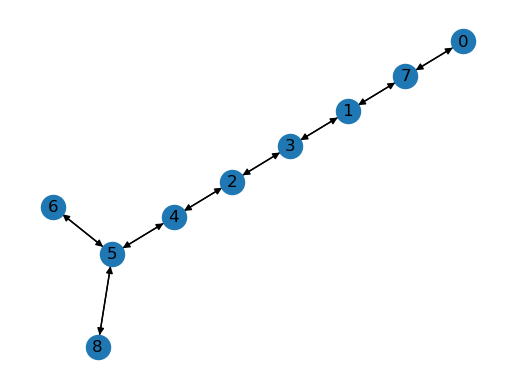

NameError: name 'mask' is not defined

In [4]:
import functools
import dgl


def get_all_neighbors(graph:dgl.DGLGraph, central_nodes, nodes:torch.Tensor, neighbor_mat, depth:int):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth == 0:
        return central_nodes, torch.eye(neighbor_mat.shape[0])[central_nodes]
    else:
        
        neighbors, neighbor_mat = get_all_neighbors(graph, central_nodes, nodes, neighbor_mat, depth-1)
        neighbor_mat = (neighbor_mat @ graph.adjacency_matrix().to_dense())
        neighbors = neighbor_mat.nonzero()[:,1]
        neighbors = torch.unique(torch.cat([nodes, neighbors]))
        return neighbors, neighbor_mat



def mask(g:dgl.DGLGraph, x:torch.Tensor, num, depth, ring_width):
    """遮盖子图，返回遮盖节点集合和中心节点集合
    Args:
        g (dgl.DGLGraph): 输入图
        x (torch.Tensor): 特征张量
        num (int): 随机遮盖的子图数量（中心点数量）
        depth (int, optional): 遮盖节点的邻居深度. Defaults to 1.
    Returns:
        torch.Tensor: mask_nodes, 遮盖节点集合
        torch.Tensor: central_nodes, 中心节点集合，可以去除，仅用在需要查看中心节点特征的情况下，猜测当gcn层数为3时，递归深度低于3就可能导致中心节点特征丢失 todo
    """
    assert 1 <= ring_width <= depth + 1, "ring_width must be in [1, depth + 1]"
    num_nodes = g.num_nodes()
    perm = torch.randperm(num_nodes, device=x.device)
    central_nodes = perm[: num]
    # print(central_nodes.device)
    assert type(central_nodes) == torch.Tensor
    central_nodes = central_nodes.to(x.device)
    # print(nodes)
    assert central_nodes.is_cuda == True

    # 外圆节点集合(含中心点)
    connected_nodes = get_all_neighbors(g, central_nodes, depth=depth)
    assert type(connected_nodes) == torch.Tensor
    mask_nodes = torch.union(central_nodes, connected_nodes)

    # 内圆节点集合(含中心点)
    not_mask_nodes = get_all_neighbors(g, central_nodes,  depth=ring_width-depth)
    not_mask_nodes = torch.union(central_nodes, not_mask_nodes)

    # 环形应遮盖节点集合，有于torch的集合操作，返回的mask_nodes一定是无重复的
    mask_nodes = torch.setdiff1d(mask_nodes, not_mask_nodes)

    return mask_nodes, central_nodes

import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

print(torch.__version__)
g = dgl.DGLGraph()
# g.add_edges([0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 4],
#             [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 0, 1, 2, 6, 7, 8, 9, 3, 4, 5])
g.add_edges(
    [1,1,2,2,4,5,5, 0],
    [7,3,3,4,5,8,6, 7]
)
g = dgl.to_bidirected(g)

# print(subg.edge)
# 将DGL图转换为networkx图
nx_g = g.to_networkx()

# 创建matplotlib图形对象
fig, ax = plt.subplots()

# 可视化networkx图
pos = nx.kamada_kawai_layout(nx_g)
nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
plt.show()

temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cuda'))

mask_nodes, central_nodes = mask(g, temp_tensor, 2, 2, 3)

print(mask_nodes)
print(central_nodes)
print(g.adjacency_matrix().to_dense())
adj_matrix = g.adjacency_matrix().to_dense()
# 用矩阵运算的方式找邻居
one_hot_central_nodes = torch.eye(adj_matrix.shape[0])[central_nodes]
print(one_hot_central_nodes)
print(one_hot_central_nodes @ adj_matrix)
neighbors_idx = (one_hot_central_nodes @ adj_matrix).nonzero()
neighbors_idx = neighbors_idx[:,1]
print(neighbors_idx)
neighbors_idx2 = (one_hot_central_nodes @ adj_matrix @ adj_matrix).nonzero()
neighbors_idx2 = neighbors_idx2[:,1]
print(neighbors_idx2)

1.10.1


/tmp/ipykernel_21017/2409170684.py:155: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


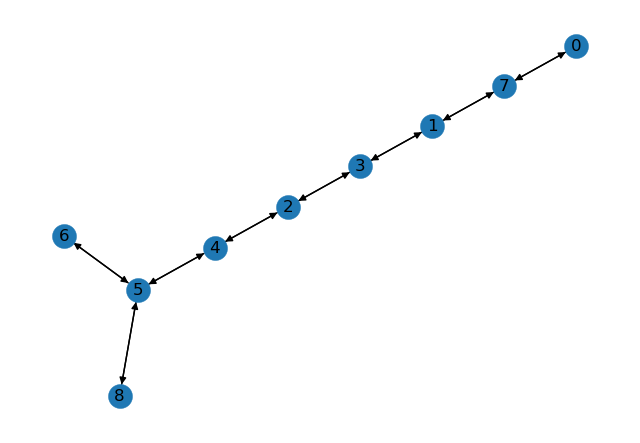

mask_nodes: tensor([1, 2, 3, 4, 5, 6], device='cuda:0')
mask_node_dtype torch.int64
central_nodes: tensor([8], device='cuda:0')
tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1.]])
tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0.]])
tensor([5])
tensor([4, 6, 8])
mask_nodes_out: tensor([1, 2, 3, 4, 7], device='cuda:0')
not_mask_nodes: tensor([1, 2, 3], device='cuda:0')
mask_nodes_out: tensor([4, 5, 6, 8], device='cuda:0')
not_mask_nodes: tensor([5, 6], device='cuda:0')
mask_nodes_out: tensor([1, 2, 3, 4, 5], device='cuda:0')
not_mask_nodes: tensor([2, 3, 4], device='cuda:0')
mask_nodes_out:

In [17]:
import functools
import dgl
import torch
import random

#     return mask_nodes
def get_neighbors_right(graph:dgl.DGLGraph, nodes:torch.Tensor):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    # # print(type(graph))
    adj_matrix = graph.adjacency_matrix()
    # 判断adj_matrix的是否在GPU上
    # # print(adj_matrix.is_cuda)
    adj_matrix = adj_matrix.to(nodes.device)
    # adj_matrix = adj_matrix.to(nodes.device)
    # # print(adj_matrix.device)
    assert adj_matrix.is_cuda == True

    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)
    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()
    # neighbors.indices()返回一个2*neighbors_num的矩阵，2 * neighbors_num，第二行是所有邻居节点标号的横向拼接
    unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
@functools.lru_cache(maxsize=16)
def get_all_neighbors_right(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth < 0:
        return torch.Tensor([]).to(nodes.device)
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors_right(graph, nodes)
        neighbors = torch.cat((neighbors, nodes), dim=0)
        neighbors = torch.unique(neighbors)
        return get_all_neighbors_right(graph, neighbors, depth-1)



#     return mask_nodes
def get_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    # print(type(graph))
    adj_matrix = graph.adjacency_matrix()
    # 判断adj_matrix的是否在GPU上
    # print(adj_matrix.is_cuda)
    adj_matrix = adj_matrix.to(nodes.device)
    # adj_matrix = adj_matrix.to(nodes.device)
    # print(adj_matrix.device)
    assert adj_matrix.is_cuda == True

    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)
    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()
    # neighbors.indices()返回一个2*neighbors_num的矩阵，2 * neighbors_num，第二行是所有邻居节点标号的横向拼接
    unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
@functools.lru_cache(maxsize=16)
def get_all_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth < 0:
        return torch.Tensor([]).to(nodes.device)
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors(graph, nodes)
        neighbors = torch.cat((neighbors, nodes), dim=0)
        neighbors = torch.unique(neighbors)
        return get_all_neighbors(graph, neighbors, depth-1)



def mask(g:dgl.DGLGraph, x:torch.Tensor, num, depth, ring_width, get_all_neighbors):
    """遮盖子图，返回遮盖节点集合和中心节点集合
    Args:
        g (dgl.DGLGraph): 输入图
        x (torch.Tensor): 特征张量
        num (int): 随机遮盖的子图数量（中心点数量）
        depth (int, optional): 遮盖节点的邻居深度. Defaults to 1.
    Returns:
        torch.Tensor: mask_nodes, 遮盖节点集合
        torch.Tensor: central_nodes, 中心节点集合，可以去除，仅用在需要查看中心节点特征的情况下，猜测当gcn层数为3时，递归深度低于3就可能导致中心节点特征丢失 todo
    """
    assert 1 <= ring_width <= depth + 1, "ring_width must be in [1, depth + 1]"
    num_nodes = g.num_nodes()
    perm = torch.randperm(num_nodes, device=x.device)
    central_nodes = perm[: num]
    # print(central_nodes.device)
    assert type(central_nodes) == torch.Tensor
    # 判断central_nodes的shape为1*num
    central_nodes = central_nodes.to(x.device)
    # print(nodes)
    assert central_nodes.is_cuda == True

    # 外圆节点集合(含中心点)
    connected_nodes_out = get_all_neighbors(g, central_nodes, depth=depth)
    assert type(connected_nodes_out) == torch.Tensor
    mask_nodes_out = torch.cat((central_nodes, connected_nodes_out), dim=0)
    mask_nodes_out = torch.unique(mask_nodes_out)
    print("mask_nodes_out:", mask_nodes_out)

    # 内圆节点集合(含中心点)
    not_mask_nodes = get_all_neighbors(g, central_nodes, depth=depth - ring_width)
    not_mask_nodes = torch.cat((central_nodes, not_mask_nodes), dim=0)
    not_mask_nodes = torch.unique(not_mask_nodes)
    print("not_mask_nodes:", not_mask_nodes)

    # 环形应遮盖节点集合，有于torch的集合操作，返回的mask_nodes一定是无重复的
    # mask_nodes = torch.masked_select(mask_nodes_out, torch.isin(mask_nodes_out, not_mask_nodes))
    mask_nodes = torch.masked_select(mask_nodes_out, torch.logical_not(torch.isin(mask_nodes_out, not_mask_nodes)))

    return mask_nodes, central_nodes

import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

plt.style.use('seaborn')

print(torch.__version__)
g = dgl.DGLGraph()
# g.add_edges([0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 4],
#             [1, 2, 3, 0, 4, 5, 6, 7, 8, 9, 0, 1, 2, 6, 7, 8, 9, 3, 4, 5])
g.add_edges(
    [1,1,2,2,4,5,5, 0],
    [7,3,3,4,5,8,6, 7]
)
g = dgl.to_bidirected(g)

# print(subg.edge)
# 将DGL图转换为networkx图
nx_g = g.to_networkx()

# 创建matplotlib图形对象
fig, ax = plt.subplots()

# 可视化networkx图
pos = nx.kamada_kawai_layout(nx_g)
nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
plt.show()

temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cuda'))

# 矩阵法找邻居原型demo
print("mask_nodes:", mask_nodes)
print("mask_node_dtype", mask_nodes.dtype)
print("central_nodes:", central_nodes)
print(g.adjacency_matrix().to_dense())
adj_matrix = g.adjacency_matrix().to_dense()
# 用矩阵运算的方式找邻居
one_hot_central_nodes = torch.eye(adj_matrix.shape[0])[central_nodes]
print(one_hot_central_nodes)
print(one_hot_central_nodes @ adj_matrix)
neighbors_idx = (one_hot_central_nodes @ adj_matrix).nonzero()
neighbors_idx = neighbors_idx[:,1]
print(neighbors_idx)
neighbors_idx2 = (one_hot_central_nodes @ adj_matrix @ adj_matrix).nonzero()
neighbors_idx2 = neighbors_idx2[:,1]
print(neighbors_idx2)


# 开始测试
num = 1
depth = random.randint(1, 5)
ring_width = random.randint(1, depth + 1)
test_times = 1000

## 有效测试次数
effective_test_times = 0
for i in range(test_times):
    mask_nodes, central_nodes = mask(g, temp_tensor, num, depth, ring_width, get_all_neighbors_right)
    mask_nodes_test, central_nodes_test = mask(g, temp_tensor, num, depth, ring_width, get_all_neighbors)
    if (torch.equal(central_nodes, central_nodes_test)):
        effective_test_times += 1 
        print("mask: ", mask_nodes)
        print("mask_test: ", mask_nodes_test)
        print("central:", central_nodes)
        print("central_test: ", central_nodes_test)
        assert torch.equal(mask_nodes, mask_nodes_test), (mask_nodes, mask_nodes_test)
        assert torch.equal(central_nodes, central_nodes_test), (central_nodes, central_nodes_test)
print(f"effective_test_times/test_times: {effective_test_times}/{test_times}")

In [12]:
# torch取并集操作
import torch
import torch

# Create two tensors
a = torch.tensor([1, 2, 3, 4, 5])
b = torch.tensor([3, 4, 5, 6, 7])

# Compute the union
c = torch.unique(torch.cat((a, b)))

# Print the result
print(c)  # Output: tensor([1, 2, 3, 4, 5, 6, 7])

tensor([1, 2, 3, 4, 5, 6, 7])


In [10]:
# torch取差集操作
import torch

# Create two tensors
# a = torch.tensor([1, 2, 3, 4, 5])
# b = torch.tensor([3, 4, 5, 6, 7])
a = torch.tensor([4,5,6,8])
b = torch.tensor([8])

# Compute the set difference
c = torch.masked_select(a, torch.logical_not(torch.isin(a, b)))

# Print the result
print(c)  # Output: tensor([1, 2])

tensor([4, 5, 6])


In [29]:
# Namespace(acc='75.83+-2.1', alpha=0.5, cuda=0, dataname='PROTEINS', depth=3, epochs=100, hidden=32, layer=2, lr=1e-05, out_hidden=64, rate=0.1, ring_width=2, w=1e-05, warmup=100.0)
# 读取上述字符串拼接为文件名
import argparse
import os
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd


# 使用scienceplots风格
print(plt.style.available)
plt.style.use('science')
plt.rcParams.update({'figure.dpi': 600})

arg_str = "Namespace(acc='75.83+-2.1', alpha=0.5, cuda=0, dataname='PROTEINS', depth=3, epochs=100, hidden=32, layer=2, lr=1e-05, out_hidden=64, rate=0.1, ring_width=2, w=1e-05, warmup=100.0)"

# 将字符串转换为字典
arg_str = arg_str.replace("Namespace(", "")
arg_str = arg_str.replace(")", "")
arg_str_ls = arg_str.split(", ")
arg_str_ls

# time_str = time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime())
# log_file_name =  ''
# for k, v in args.__dict__.items():
#     log_file_name += f"{k}-{v}_"
# log_file_name = log_file_name[:-1]
# file = open(f"logs/{time_str}_{log_file_name}_seed-{seed}.csv", "w")

file_name = ""
for i in arg_str_ls:
    i = i.replace("'", "")
    k, v = i.split("=")
    print(k, v)
    file_name += f"{k}-{v}_"
file_name = file_name[:-1]
print(file_name)

log_data_file = ''
for root, dirs, files in os.walk("logs"):
    for file in files:
        file_name = "2023-05-22_01"
        if file.find(file_name) != -1:
            print(file)
            log_data_file = file
data = pd.read_csv(f"logs/{log_data_file}")

    


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
acc 75.83+-2.1
alpha 0.5
cuda 0
dataname PROTEINS
depth 3
epochs 100
hidden 32
layer 2
lr 1e-05
out_hidden 64
rate 0.1
ring_width 2
w 1e-05
warmup 100.0
acc-75.83+-2.1_alpha-0.5_cuda-0_dataname-PROTEINS_depth-3_epochs-100_hidden-32_layer-2_lr-1e-05_out_hidden-64_rate-0.1_ring_width-2_w-1e-05_warmup-100.0
2023-05-14_15-14-06_dataname-IMDB-BINARY_cuda-0_depth-1_rate-0.1_out_hidden-64_hidden-32_epochs-100_lr-1e-05_warmup-100.0_w-0.0005_ac

IsADirectoryError: [Errno 21] Is a directory: 'logs/'